# Predicting Car Prices 

**Automobile Data Set** is created by Jeffrey C. Schlimmer and is shared by UCI on its archive named as **UCI Machine Learning Repository**. Information regarding to this data set is shared on UCI's Repository as follows:

*This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.*

*The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.*

**My aim is to predict the prices of cars with respect to their features by using Regression Models.**

In [1]:
#import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the file
columns =["symbol","norm_loss","brand","fuel_type","aspiration","num_doors","body_style","wheel","engine_loc","wheel_base","length","width",
           "height","curb_weight","engine_type","num_cylinder","engine_size","fuel_system","bore","stroke","compress_ratio","horsepower","peak_rpm",
           "city_mpg","highway_mpg","price"] 

df = pd.read_csv("imports-85.data",header=None,names=columns)
df.head(10)

,symbol,norm_loss,brand,fuel_type,aspiration,num_doors,body_style,wheel,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,compress_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
#Data set's size
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symbol            205 non-null int64
norm_loss         205 non-null object
brand             205 non-null object
fuel_type         205 non-null object
aspiration        205 non-null object
num_doors         205 non-null object
body_style        205 non-null object
wheel             205 non-null object
engine_loc        205 non-null object
wheel_base        205 non-null float64
length            205 non-null float64
width             205 non-null float64
height            205 non-null float64
curb_weight       205 non-null int64
engine_type       205 non-null object
num_cylinder      205 non-null object
engine_size       205 non-null int64
fuel_system       205 non-null object
bore              205 non-null object
stroke            205 non-null object
compress_ratio    205 non-null float64
horsepower        205 non-null object
peak_rpm          205 non-null object
city_mpg          2

In [5]:
#Is there any null values in the dataset?

df.isna().sum()

symbol            0
norm_loss         0
brand             0
fuel_type         0
aspiration        0
num_doors         0
body_style        0
wheel             0
engine_loc        0
wheel_base        0
length            0
width             0
height            0
curb_weight       0
engine_type       0
num_cylinder      0
engine_size       0
fuel_system       0
bore              0
stroke            0
compress_ratio    0
horsepower        0
peak_rpm          0
city_mpg          0
highway_mpg       0
price             0
dtype: int64

When checking the first 10 rows, we saw that there were values with ? so it is high likely that null values are presented with "?" in this dataset. Let's check the "?" values in this data set:

In [6]:
df.isin(["?"]).any()

symbol            False
norm_loss          True
brand             False
fuel_type         False
aspiration        False
num_doors          True
body_style        False
wheel             False
engine_loc        False
wheel_base        False
length            False
width             False
height            False
curb_weight       False
engine_type       False
num_cylinder      False
engine_size       False
fuel_system       False
bore               True
stroke             True
compress_ratio    False
horsepower         True
peak_rpm           True
city_mpg          False
highway_mpg       False
price              True
dtype: bool

The columns **norm_loss, bore, stroke, horsepower, peak_rpm and price** should be converted to a numerical type and then, ""?"" values must be replaced with np.nan. The same is true for num_doors column, but the values under this column are string so first they need to be mapped.

In [7]:
#Convert column to numerical values
df = df.replace("?",np.nan)

df.norm_loss = pd.to_numeric(df.norm_loss)
df.bore = pd.to_numeric(df.bore)
df.stroke = pd.to_numeric(df.stroke)
df.horsepower = pd.to_numeric(df.horsepower)
df.peak_rpm = pd.to_numeric(df.peak_rpm)
df.price = pd.to_numeric(df.price)

In [8]:
df.isna().sum()

symbol             0
norm_loss         41
brand              0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
wheel              0
engine_loc         0
wheel_base         0
length             0
width              0
height             0
curb_weight        0
engine_type        0
num_cylinder       0
engine_size        0
fuel_system        0
bore               4
stroke             4
compress_ratio     0
horsepower         2
peak_rpm           2
city_mpg           0
highway_mpg        0
price              4
dtype: int64

In [9]:
#Call SimpleImputer

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="mean")

#Start imputation
df[["norm_loss"]] = imp.fit_transform(df[["norm_loss"]])
df[["bore"]] = imp.fit_transform(df[["bore"]])
df[["stroke"]] = imp.fit_transform(df[["stroke"]])
df[["horsepower"]] = imp.fit_transform(df[["horsepower"]])
df[["peak_rpm"]] = imp.fit_transform(df[["peak_rpm"]])
df[["price"]] = imp.fit_transform(df[["price"]])

In [10]:
#changing the values under num_doors column

df.num_doors = df.num_doors.map({"two":2,"four":4})
df.num_doors = df.num_doors.fillna(df.num_doors.median())
df.num_doors.unique()

array([2., 4.])

In [11]:
df.isna().sum()

symbol            0
norm_loss         0
brand             0
fuel_type         0
aspiration        0
num_doors         0
body_style        0
wheel             0
engine_loc        0
wheel_base        0
length            0
width             0
height            0
curb_weight       0
engine_type       0
num_cylinder      0
engine_size       0
fuel_system       0
bore              0
stroke            0
compress_ratio    0
horsepower        0
peak_rpm          0
city_mpg          0
highway_mpg       0
price             0
dtype: int64

It looks like our data set is now NaN-free!

## Data visualization

In this section, I want to analyze the data set visually to get some idea about values it had given.

#### Question 1: What are the most frequent five brands that appeared in this dataset?

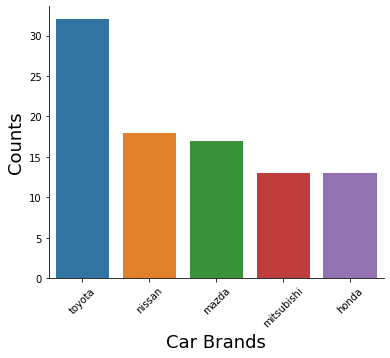

In [12]:
plt.figure(figsize=(6,5))
sns.barplot(x = df.brand.value_counts().sort_values(ascending=False).head(5).index,
           y=df.brand.value_counts().sort_values(ascending=False).head(5).values,
           data=df)
plt.xticks(rotation=45)
plt.xlabel("Car Brands",fontsize=18)
plt.ylabel("Counts",fontsize=18)
sns.despine()
plt.show()

**Toyota** is the most frequently appeared brand in this data set.

#### Question 2: What are the least frequent five brands that appeared in this dataset?

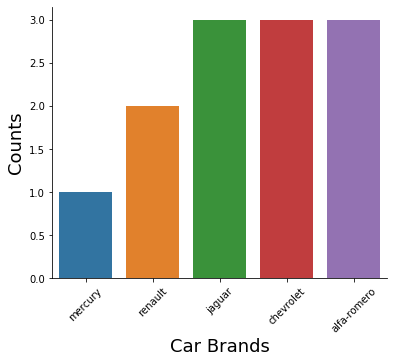

In [13]:
plt.figure(figsize=(6,5))
sns.barplot(x = df.brand.value_counts().sort_values(ascending=True)[:5].index,
           y=df.brand.value_counts().sort_values(ascending=True)[:5].values,
           data=df)
plt.xticks(rotation=45)
plt.xlabel("Car Brands",fontsize=18)
plt.ylabel("Counts",fontsize=18)
sns.despine()
plt.show()

The brand **Mercury** is the least appeared brand in the data set, there is only one car model from Mercury in this data set!

**Question 3: What is the relation between horsepower and cars' prices?**

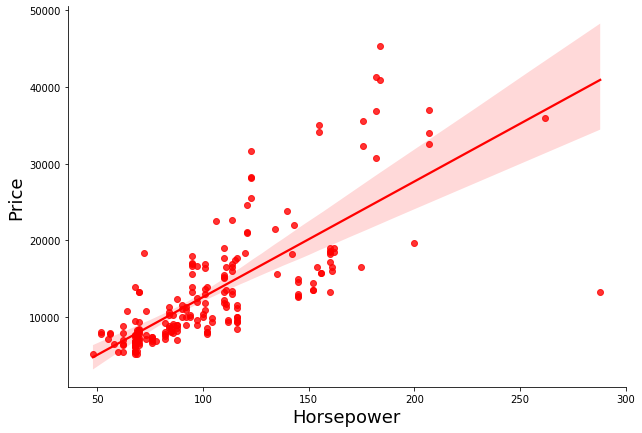

In [14]:
plt.figure(figsize=(10,7))
sns.regplot(x = df.horsepower.values, y = df.price.values, data=df,color="red")
plt.xlabel("Horsepower",fontsize=18)
plt.ylabel("Price",fontsize=18)
sns.despine()
plt.show()

**Question 4: What is the relation between engine size and cars' prices?**

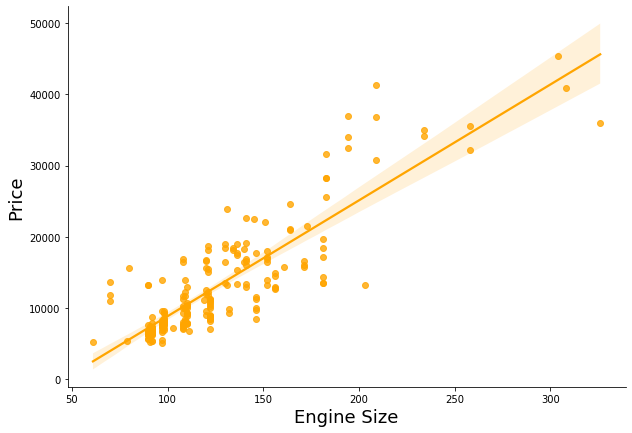

In [15]:
plt.figure(figsize=(10,7))
sns.regplot(x = df.engine_size.values, y = df.price.values, data=df,color="orange")
plt.xlabel("Engine Size",fontsize=18)
plt.ylabel("Price",fontsize=18)
sns.despine()
plt.show()

**Question 5: What is the relation between city_mpg and cars' prices?**

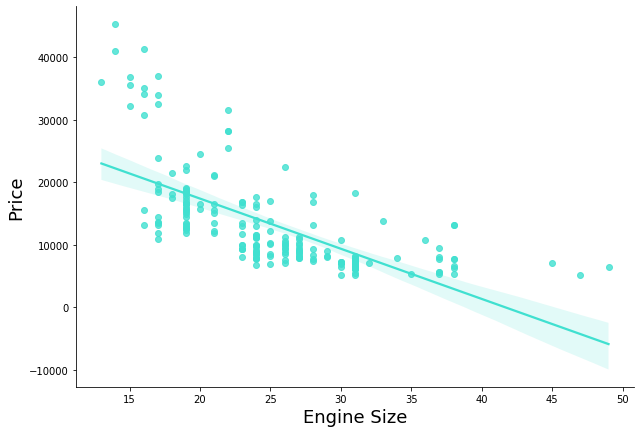

In [16]:
plt.figure(figsize=(10,7))
sns.regplot(x = df.city_mpg.values, y = df.price.values, data=df,color="turquoise")
plt.xlabel("Engine Size",fontsize=18)
plt.ylabel("Price",fontsize=18)
sns.despine()
plt.show()

It can be said overall that there is not an important correlational relationship between variables.

## Data Preparation

In [17]:
dataset = df.copy()

#Generate binary values using get_dummies
symbol_dummies = pd.get_dummies(dataset,columns=["symbol","brand","fuel_type","aspiration","num_doors","body_style","wheel","engine_loc",
                 "engine_type","num_cylinder","fuel_system"],
                 prefix=["symbol","brand","fuel_type","aspiration","num_doors","body_style","wheel","engine_loc",
                 "engine_type","num_cylinder","fuel_system"])
dataset=dataset.join(symbol_dummies,how="left",lsuffix='_left')
dataset.head(10)

,symbol,norm_loss_left,brand,fuel_type,aspiration,num_doors,body_style,wheel,engine_loc,wheel_base_left,...,num_cylinder_twelve,num_cylinder_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0
5,2,122.0,audi,gas,std,2.0,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
6,1,158.0,audi,gas,std,4.0,sedan,fwd,front,105.8,...,0,0,0,0,0,0,0,1,0,0
7,1,122.0,audi,gas,std,4.0,wagon,fwd,front,105.8,...,0,0,0,0,0,0,0,1,0,0
8,1,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,...,0,0,0,0,0,0,0,1,0,0
9,0,122.0,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,0,0,0,0,0,0,0,1,0,0


In [18]:
dataset = dataset.drop(['symbol', 'norm_loss', 'brand', 'fuel_type', 'aspiration', 'num_doors',
       'body_style', 'wheel', 'engine_loc', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_cylinder', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compress_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],axis=1)
dataset.columns

Index(['norm_loss_left', 'wheel_base_left', 'length_left', 'width_left',
       'height_left', 'curb_weight_left', 'engine_size_left', 'bore_left',
       'stroke_left', 'compress_ratio_left', 'horsepower_left',
       'peak_rpm_left', 'city_mpg_left', 'highway_mpg_left', 'price_left',
       'symbol_-2', 'symbol_-1', 'symbol_0', 'symbol_1', 'symbol_2',
       'symbol_3', 'brand_alfa-romero', 'brand_audi', 'brand_bmw',
       'brand_chevrolet', 'brand_dodge', 'brand_honda', 'brand_isuzu',
       'brand_jaguar', 'brand_mazda', 'brand_mercedes-benz', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'fuel_type_diesel',
       'fuel_type_gas', 'aspiration_std', 'aspiration_turbo', 'num_doors_2.0',
       'num_doors_4.0', 'body_style_convertible', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 

#### Question 6: What's the correlational relation between variables?

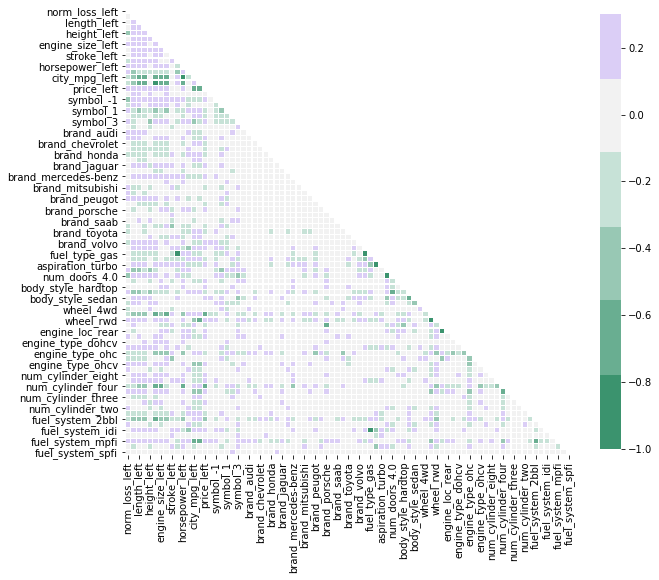

In [19]:
plt.figure(figsize=(10,10))
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(corr, cmap=cmap,mask=mask, vmax=.3, center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": 0.8})

In [20]:
#Defining X and y

X = dataset.loc[:,dataset.columns != "price_left" ]
X.columns

Index(['norm_loss_left', 'wheel_base_left', 'length_left', 'width_left',
       'height_left', 'curb_weight_left', 'engine_size_left', 'bore_left',
       'stroke_left', 'compress_ratio_left', 'horsepower_left',
       'peak_rpm_left', 'city_mpg_left', 'highway_mpg_left', 'symbol_-2',
       'symbol_-1', 'symbol_0', 'symbol_1', 'symbol_2', 'symbol_3',
       'brand_alfa-romero', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_dodge', 'brand_honda', 'brand_isuzu', 'brand_jaguar',
       'brand_mazda', 'brand_mercedes-benz', 'brand_mercury',
       'brand_mitsubishi', 'brand_nissan', 'brand_peugot', 'brand_plymouth',
       'brand_porsche', 'brand_renault', 'brand_saab', 'brand_subaru',
       'brand_toyota', 'brand_volkswagen', 'brand_volvo', 'fuel_type_diesel',
       'fuel_type_gas', 'aspiration_std', 'aspiration_turbo', 'num_doors_2.0',
       'num_doors_4.0', 'body_style_convertible', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wa

In [21]:
y = dataset.loc[:,"price_left"]
y

0      13495.000000
1      16500.000000
2      16500.000000
3      13950.000000
4      17450.000000
5      15250.000000
6      17710.000000
7      18920.000000
8      23875.000000
9      13207.129353
10     16430.000000
11     16925.000000
12     20970.000000
13     21105.000000
14     24565.000000
15     30760.000000
16     41315.000000
17     36880.000000
18      5151.000000
19      6295.000000
20      6575.000000
21      5572.000000
22      6377.000000
23      7957.000000
24      6229.000000
25      6692.000000
26      7609.000000
27      8558.000000
28      8921.000000
29     12964.000000
           ...     
175     9988.000000
176    10898.000000
177    11248.000000
178    16558.000000
179    15998.000000
180    15690.000000
181    15750.000000
182     7775.000000
183     7975.000000
184     7995.000000
185     8195.000000
186     8495.000000
187     9495.000000
188     9995.000000
189    11595.000000
190     9980.000000
191    13295.000000
192    13845.000000
193    12290.000000


## Model - Lasso Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
model = Lasso(alpha=0.02, max_iter=10000,normalize=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print("R2 of the model is", r2_score(y_test,y_pred))

MSE: 7978604.265743228
MAE: 1901.8198670911027
R2 of the model is 0.8769551395513459


Text(0, 0.5, 'Actual Price')

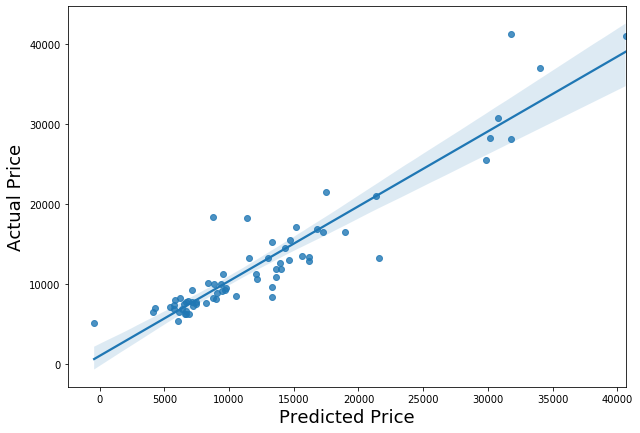

In [25]:
plt.figure(figsize=(10,7))
sns.regplot(y_pred,y_test)
plt.xlabel("Predicted Price",fontsize=18)
plt.ylabel("Actual Price",fontsize=18)

## Model - Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10)
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)

0.9736491739217613

In [29]:
rfr_pred = rfr.predict(X_test)
print('MSE:',mean_squared_error(y_test,rfr_pred))
print('MAE:',mean_absolute_error(y_test,rfr_pred))
print("R2 of the model is", r2_score(y_test,rfr_pred))

MSE: 5177561.98341009
MAE: 1520.2585656579788
R2 of the model is 0.9201524012854889
